# Chapter 1: Introduction

In [1]:
import pandas as pd
import numpy as np
import mglearn
import sklearn
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.linear_model import LogisticRegression

In [ ]:
from mglearn.datasets import load_extended_boston
load_extended_boston()

In [2]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [3]:
print("Keys of iris_dataset:", iris_dataset.keys())

Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print("Target names:", iris_dataset["target_names"])

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature names:", iris_dataset["feature_names"])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Types of data:", type(iris_dataset["data"]))

Types of data: <class 'numpy.ndarray'>


In [7]:
print("Shape of the data:", iris_dataset["data"].shape)

Shape of the data: (150, 4)


In [8]:
print("First five rows of data:\n", iris_dataset["data"][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print("First five of target:", iris_dataset["target"][:5])

First five of target: [0 0 0 0 0]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state=0)

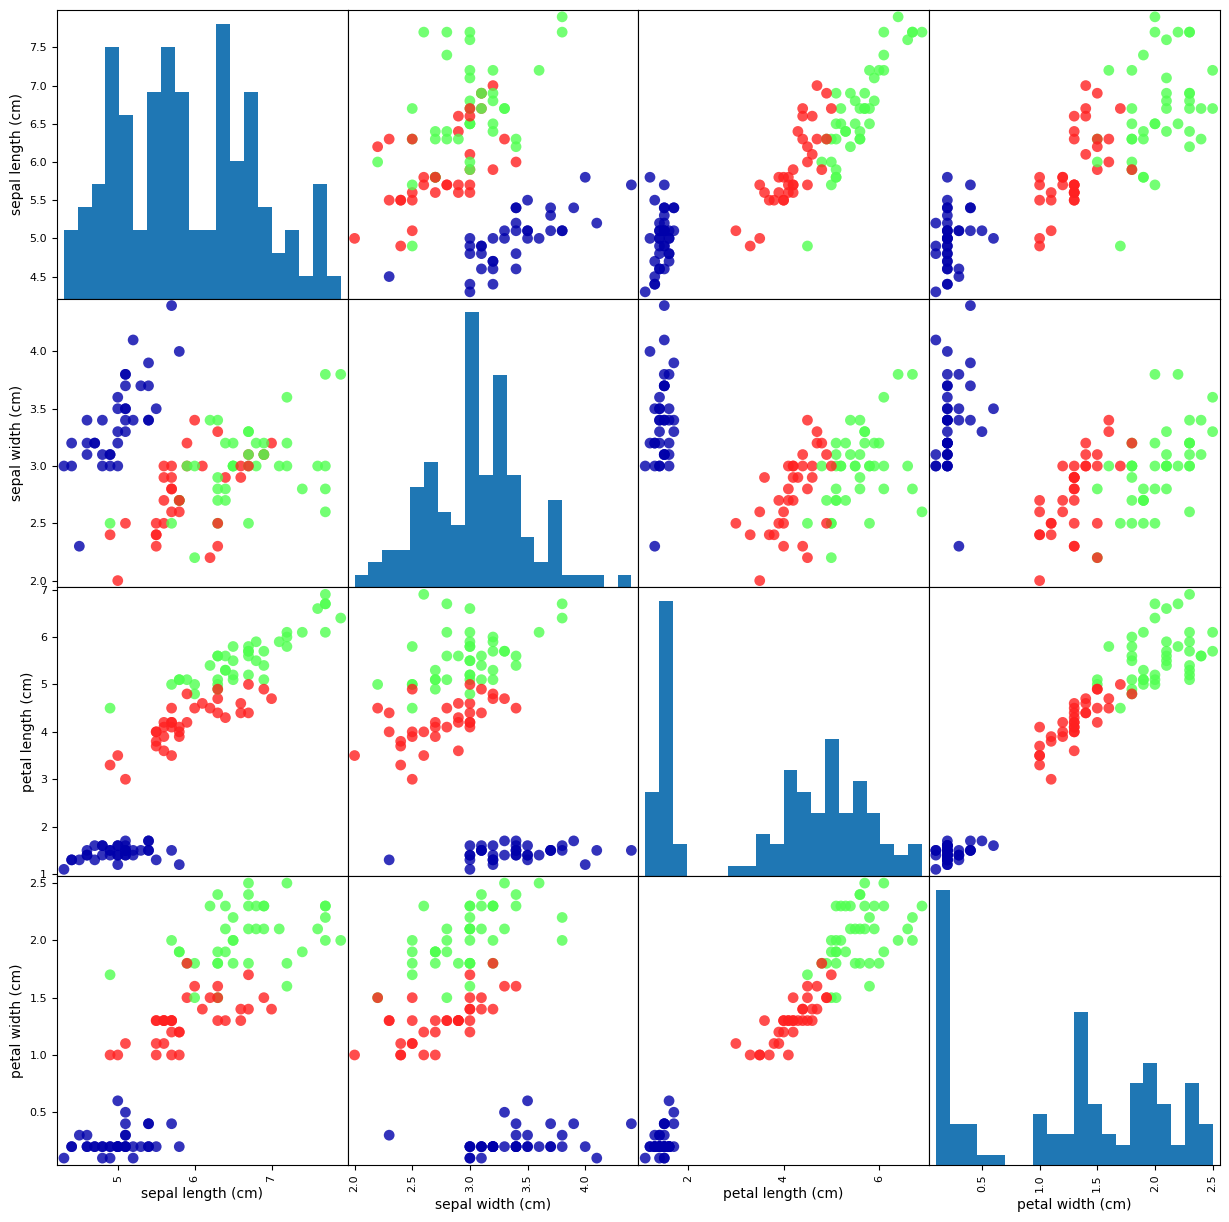

In [19]:
iris_dataframe=pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker="o", hist_kwds={"bins": 20}, s=60, alpha=0.8, cmap=mglearn.cm3)
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
X_new=np.array([[5,2.9,1,0.2]])
prediction=knn.predict(X_new)

In [23]:
print("Prediction:", prediction)
print("Predicted target name:", iris_dataset["target_names"][prediction])

Prediction: [0]
Predicted target name: ['setosa']


In [24]:
y_pred=knn.predict(X_test)
print("Test set predictions:", y_pred)

Test set predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [25]:
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))

Test set score: 0.97


In [28]:
# Alternatively, use knn.score
knn.score(X_test, y_test)

0.9736842105263158

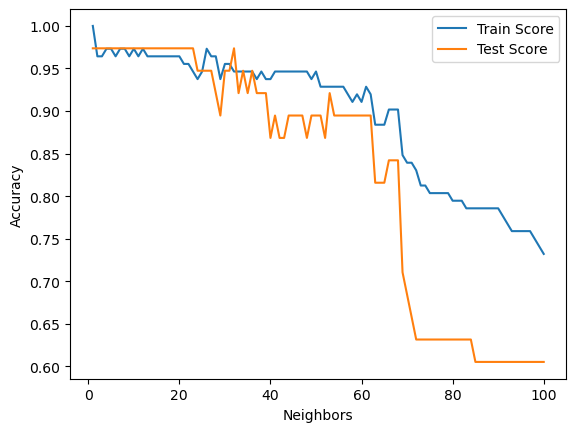

In [41]:
neighbors=[]
train_score=[]
test_score=[]
for i in range(1,101):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    neighbors.append(i)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

df=pd.DataFrame({"Neighbors":neighbors, "Train Score": train_score, "Test Score": test_score})
df.plot(x="Neighbors", ylabel="Accuracy")
plt.show()

# Chapter 2: Supervised Learning

In [3]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
print(cancer.data.shape[0],"data points,",cancer.data.shape[1],"features")

569 data points, 30 features


In [24]:
print("Features:",cancer.feature_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [28]:
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


In [29]:
from mglearn.datasets import load_boston
boston=load_boston()

In [2]:
from sklearn.linear_model import LinearRegression

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr=LinearRegression().fit(X_train, y_train)
print("make_wave coefficient: {:.2f}".format(lr.coef_[0]))
print("make_wave intercep: {:.2f}".format(lr.intercept_))

In [45]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train)
print("Training score: {:.0f}%".format(100*ridge.score(X_train,y_train)))
print("Test score: {:.0f}%".format(100*ridge.score(X_test,y_test)))

Training score: 67%
Test score: 66%


In [57]:
np.arange(0,1.1,0.1)
range(2,11,1)

range(2, 11)

In [87]:
alpha=[]
train_score=[]
test_score=[]
for i in np.arange(0.001,2.001,0.001):
    alpha.append(i)
    train_score.append(100*Ridge(alpha=i).fit(X_train,y_train).score(X_train,y_train))
    test_score.append(100*Ridge(alpha=i).fit(X_train,y_train).score(X_test,y_test))

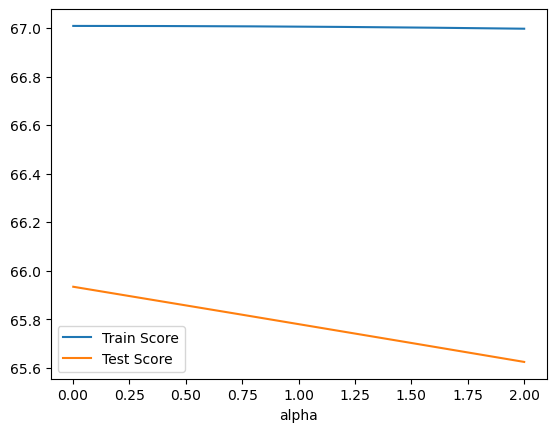

In [93]:
df=pd.DataFrame({"Alpha":alpha, "Train Score":train_score, "Test Score":test_score})
df.plot(x="Alpha", xlabel="alpha")

plt.show()

In [4]:
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))[["date","price"]]

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data_train=ram_prices[ram_prices.date < 2e+03]
data_test=ram_prices[ram_prices.date >= 2e+03]
X_train=np.array(data_train.date)[:,np.newaxis]
y_train=np.log(data_train.price)
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)
X_all=np.array(ram_prices.date)[:, np.newaxis]
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

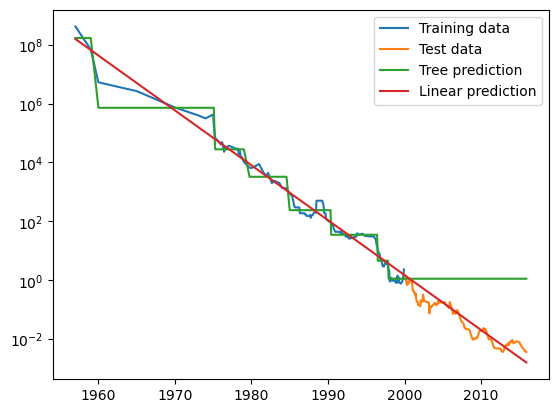

In [38]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.datasets import make_moons

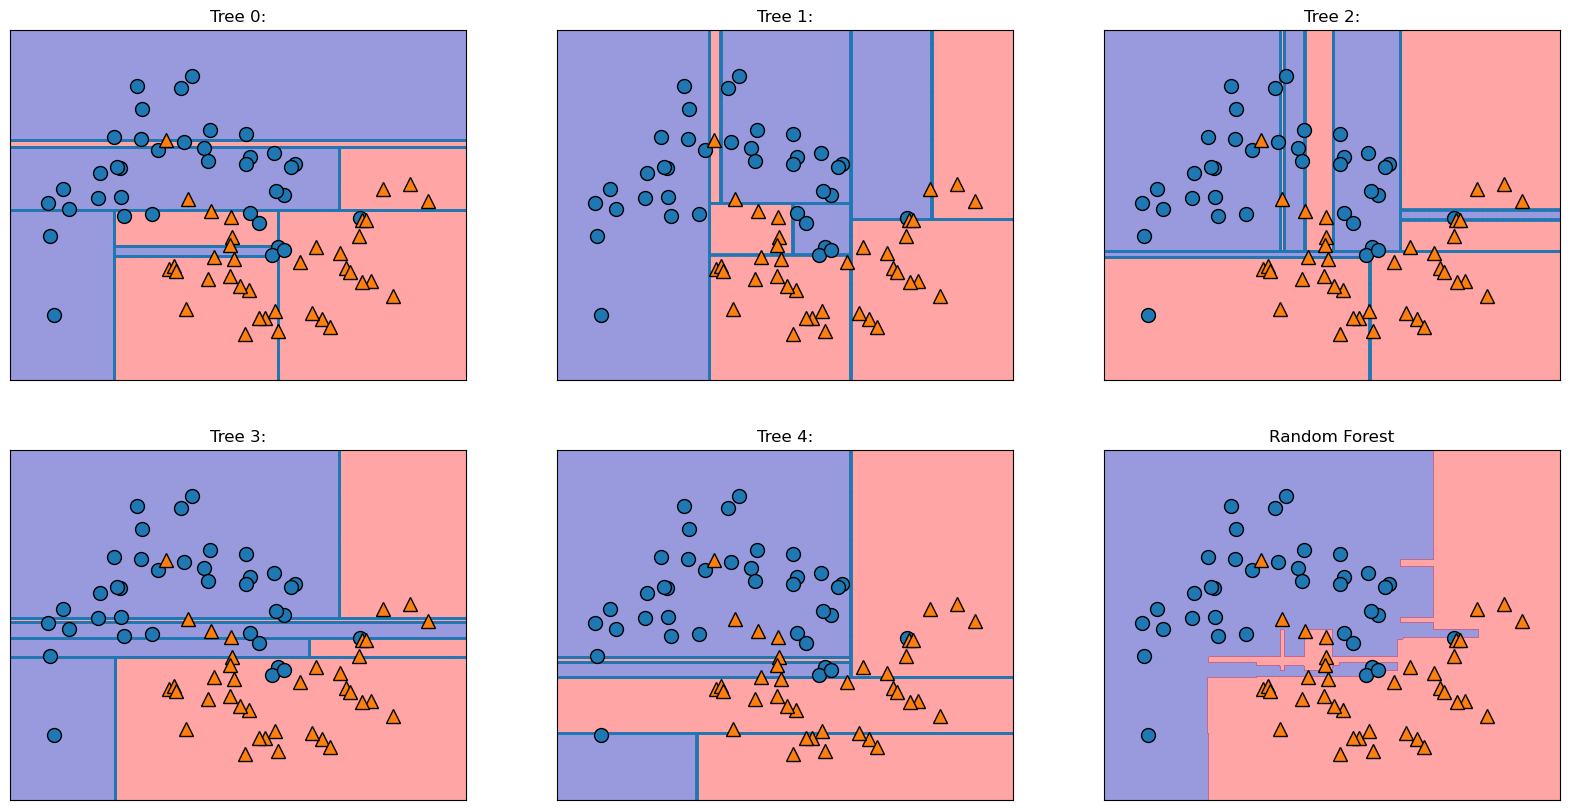

In [13]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest=RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}:".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest=RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
print("Accuracy in the training set: {:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy in the test set: {:.3f}".format(forest.score(X_test,y_test)))

Accuracy in the training set: 1.000
Accuracy in the test set: 0.972


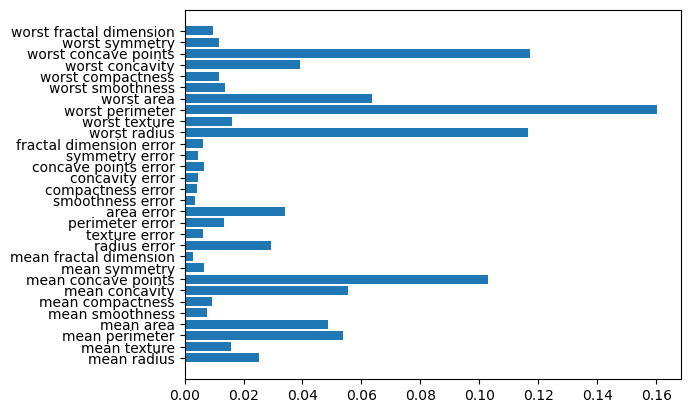

In [44]:
plt.barh(cancer.feature_names, forest.feature_importances_)
plt.show()

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)
print("Accuracy on training data: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test data: {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training data: 1.000
Accuracy on test data: 0.965


In [5]:
from sklearn.datasets import make_blobs

In [7]:
from sklearn.svm import LinearSVC

D:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


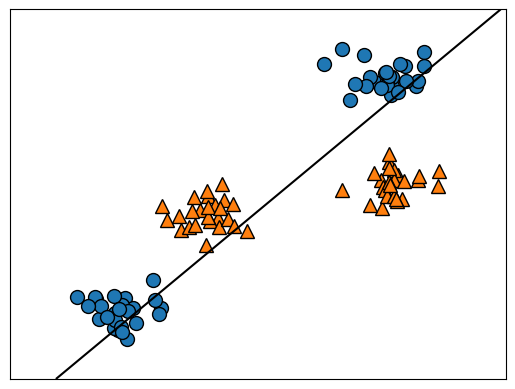

In [5]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
#mglearn.discrete_scatter(X[:,0], X[:,1], y)
linear_svm=LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

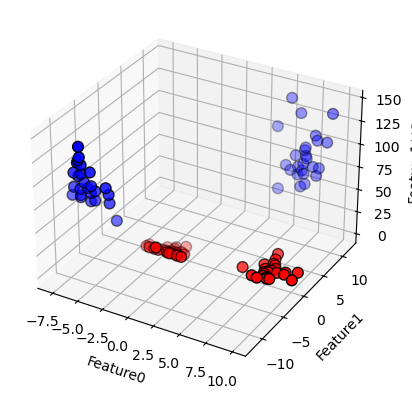

In [6]:
X_new=np.hstack([X, X[:,1:]**2])
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")
mask= y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", marker="o", s=60, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="o", s=60, edgecolor="k")
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")
plt.show()

D:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


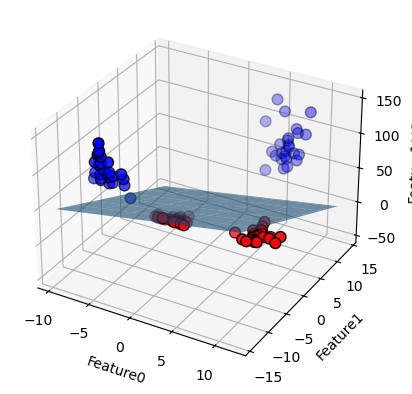

In [7]:
linear_svm_3d=LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure=plt.figure()
ax=figure.add_subplot(111, projection="3d")
xx=np.linspace(X_new[:,0].min() -2, X_new[:,0].max() + 2, 50)
yy=np.linspace(X_new[:,1].min() -2, X_new[:,1].max() + 2, 50)
XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.6)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", marker="o", s=60, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="o", s=60, edgecolor="k")
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")
plt.show()

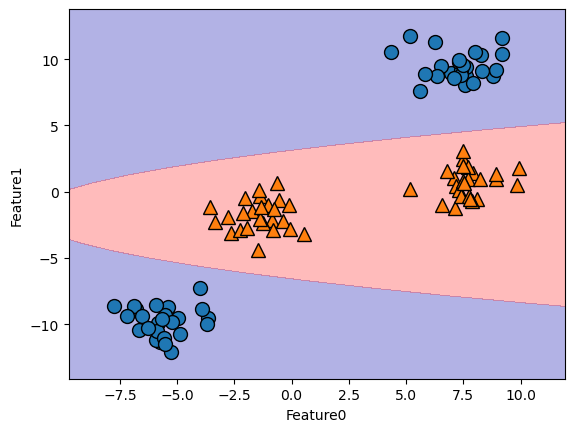

In [8]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()], alpha=.3, cmap=mglearn.cm2)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
plt.show()

In [8]:
from sklearn.svm import SVC

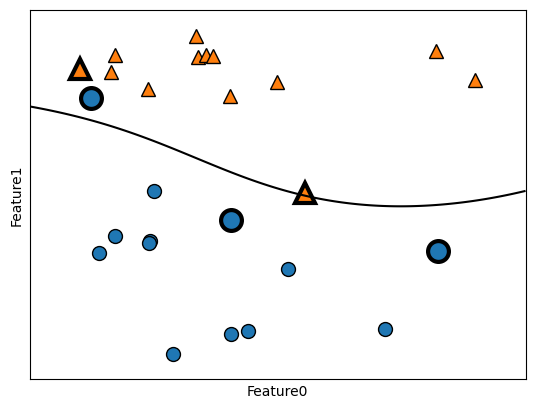

In [33]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel="rbf", C=10, gamma=.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1],sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [39]:
min_on_training=X_train.min(axis=0)# the minimum of each feature
range_on_training=(X_train - min_on_training).max(axis=0)
X_train_scaled=(X_train - min_on_training)/range_on_training
X_test_scaled=(X_test - min_on_training)/range_on_training

In [38]:
# Compare accuracy of the SVM on scaled and unscaled data
svc0=SVC().fit(X_train, y_train)
print("Accuracy of SVM trained on unscaled data on training data: {:.2f}".format(svc0.score(X_train,y_train)))
print("Accuracy of SVM trained on unscaled data on unscaled test data: {:.2f}".format(svc0.score(X_test,y_test)))

Accuracy of SVM trained on unscaled data on training data: 0.90
Accuracy of SVM trained on unscaled data on unscaled test data: 0.94


In [41]:
svc1=SVC().fit(X_train_scaled, y_train)
print("Accuracy of SVM trained on scaled data on training data: {:.2f}".format(svc1.score(X_train_scaled,y_train)))
print("Accuracy of SVM trained on scaled data on unscaled test data: {:.2f}".format(svc1.score(X_test_scaled,y_test)))

Accuracy of SVM trained on scaled data on training data: 0.98
Accuracy of SVM trained on scaled data on unscaled test data: 0.97


In [10]:
from sklearn.neural_network import MLPClassifier

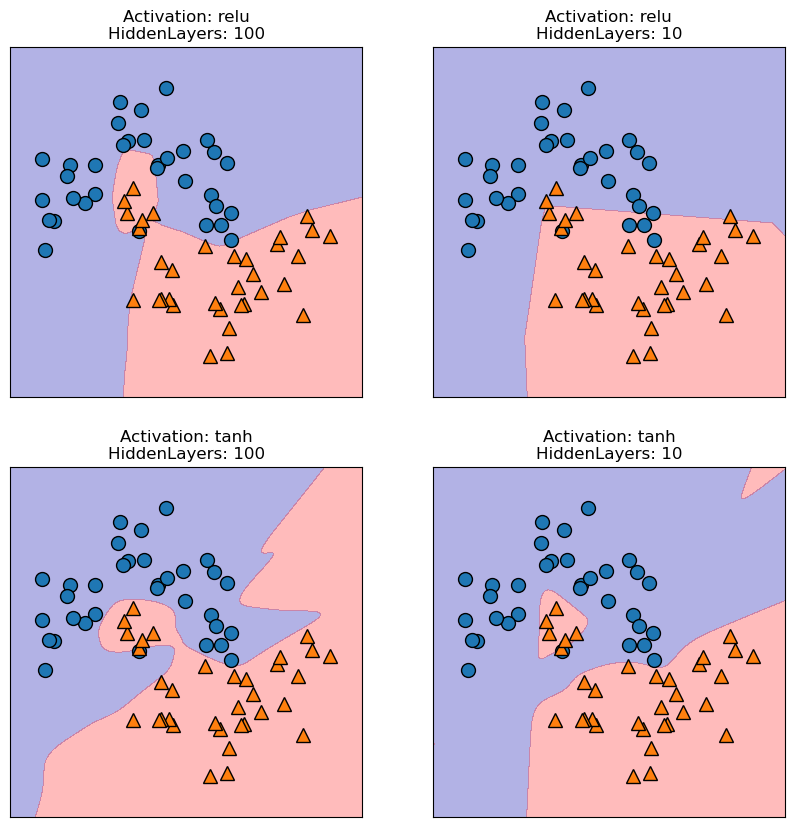

In [68]:
X, y = make_moons(n_samples=90, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(10,10))
act=["relu","relu","tanh","tanh"]
hidden=[100,10,100,10]
for a, h, ax in zip(act, hidden, axes.ravel()):# You need to use .ravel() is there's more than one row of subplots
    mlp=MLPClassifier(solver="lbfgs", activation=a, hidden_layer_sizes=h, random_state=0).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
    ax.set_title("Activation: {}\nHiddenLayers: {}".format(a,h))

plt.show()

In [12]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, random_state=0)

In [36]:
mean_on_train=X_train.mean(axis=0)# Use axis=0 to calculate the feature averages; if you want the row averages use axis=1
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train

mean_on_test=X_test.mean(axis=0)
std_on_test=X_test.std(axis=0)
X_test_scaled=(X_test-mean_on_test)/std_on_test

mlp=MLPClassifier(random_state=42).fit(X_train_scaled, y_train)
print("Accuracy on scaled training data: {:.1f}%".format(1e2*mlp.score(X_train_scaled,y_train)))
print("Accuracy on scaled test data: {:.1f}%".format(1e2*mlp.score(X_test_scaled,y_test)))

Accuracy on scaled training data: 99.3%
Accuracy on scaled test data: 95.8%


D:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
X, y = make_circles(noise=.25, factor=.5, random_state=1)
y_named=np.array(["blue","red"])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

The output of decision_function is a quantitative measure of the model's confidence in it's prediction. A positive value indicates a preference for the positive class, a negative value indicates a preference for the negative class.

In [27]:
print("X_test_shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test_shape: (25, 2)
Decision function shape: (25,)


In [28]:
gbrt.decision_function(X_test)

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081, -7.69097179,  4.11001686,  1.10753937,  3.40782222,
       -6.46255955,  4.28986642,  3.90156346, -1.20031247,  3.66166081,
       -4.17231157, -1.23010079, -3.91576223,  4.03602783,  4.11001686,
        4.11001686,  0.65709014,  2.69826265, -2.65673274, -1.86776596])

In [29]:
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [30]:
gt0=(gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[gt0]
print("pred is equal to model predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

pred is equal to model predictions: True


In [31]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


The predict_proba function is easier to understand. The column 1 is the probability of class 1, column 2 is the probability of class 2.

In [32]:
gbrt.predict_proba(X_test).round(2)[0:6,]

array([[0.02, 0.98],
       [0.85, 0.15],
       [0.98, 0.02],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.03, 0.97]])

In [33]:
y_test[0:6]

array([1, 0, 0, 0, 1, 1], dtype=int64)

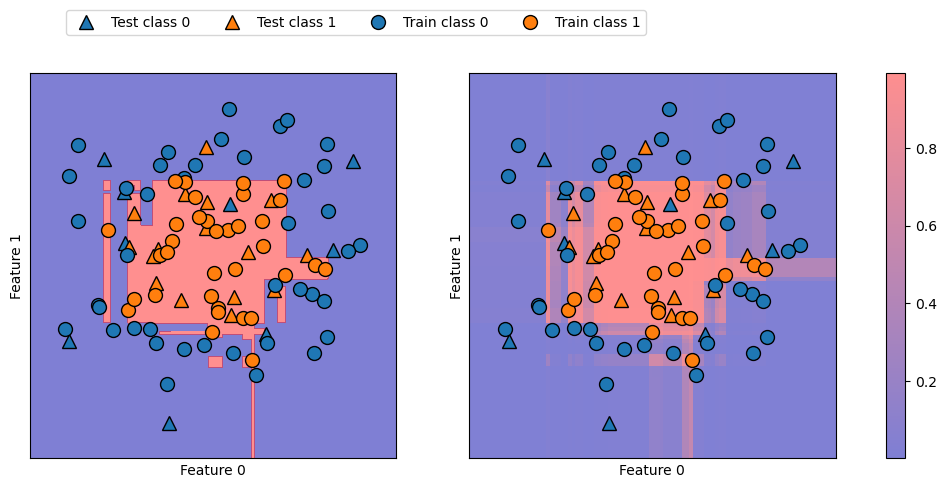

In [34]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.5, fill=True, cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], cm=mglearn.ReBl, function="predict_proba", alpha=.5)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers="o", ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar=plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"], ncol=4, loc=(.1,1.1))
plt.show()

decision_function is not restricted to data with only two classes. The iris_dataset has three classes, the output of decision_function is a certainty score for each class; the same is trues for predict_proba.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=42)
gbrt=GradientBoostingClassifier(learning_rate=.01, random_state=0)
gbrt.fit(X_train, y_train)
gbrt.decision_function(X_test)[0:6]

array([[-1.995715  ,  0.04758267, -1.92720695],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.99058203, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99730159, -0.13469108, -1.20341483],
       [ 0.06146394, -1.90755736, -1.92793758]])

In [17]:
gbrt.predict_proba(X_test)[0:6]

array([[0.10217718, 0.78840034, 0.10942248],
       [0.78347147, 0.10936745, 0.10716108],
       [0.09818072, 0.11005864, 0.79176065],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10360005, 0.66723901, 0.22916094],
       [0.78347147, 0.10936745, 0.10716108]])

In [21]:
print("Argmax of predicted probabilities: {}".format(np.argmax(gbrt.predict_proba(X_test[0:6]), axis=1)))
print("Predicted target: {}".format(gbrt.predict(X_test[0:6])))

Argmax of predicted probabilities: [1 0 2 1 1 0]
Predicted target: [1 0 2 1 1 0]


# Chapter 3: Unsupervised Learning & Preprocessing

In unsupervised learning, the algorithm isn't given any known output, it just looks and the input data it's given and asked to extract knowledge from it.

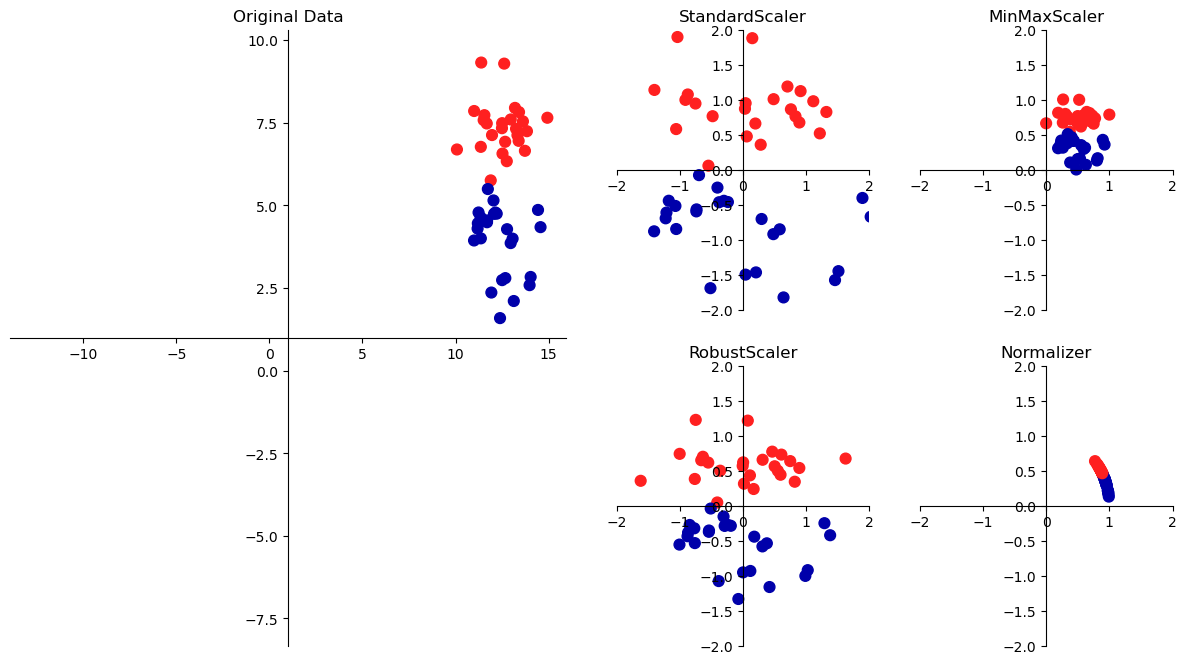

In [2]:
mglearn.plots.plot_scaling()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
print("per-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print("per-feature minimum after scaling:\n{}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum before scaling:\n{}".format(X_train.max(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_train_scaled.max(axis=0)))

per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature maximum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [20]:
X_test_scaled=scaler.transform(X_test)
print("per-feature minimum after scaling:\n\n{}\n".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]

per-feature maximum after scaling:

[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


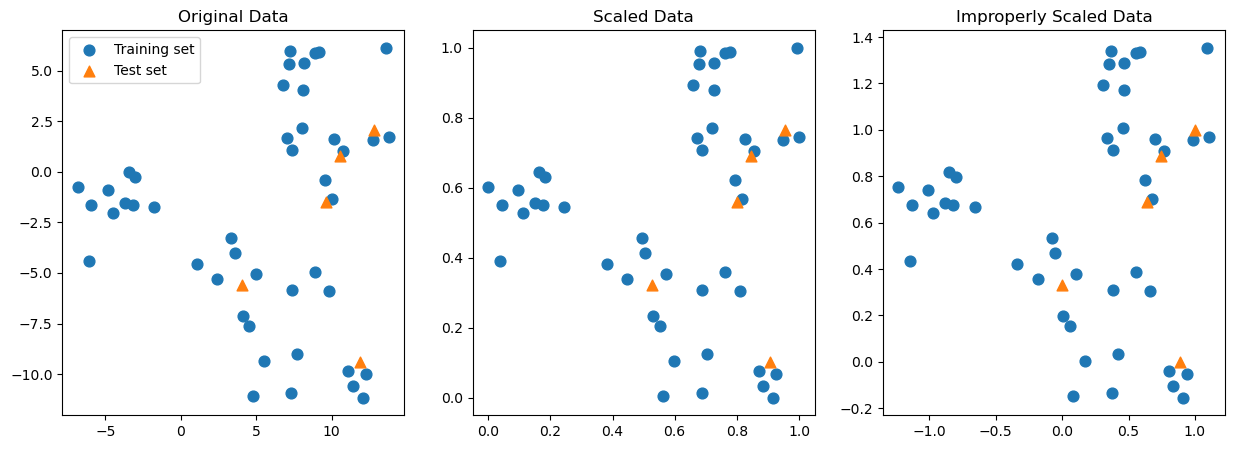

In [36]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].scatter(X_train[:,0], X_train[:,1], label="Training set", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], label="Test set", s=60, marker="^")
axes[0].legend(loc="best")
axes[0].set_title("Original Data")

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], s=60, marker="^")
axes[1].set_title("Scaled Data")

# WARNING: do not do this
scaler2=MinMaxScaler()
X_test_scaled2=scaler2.fit(X_test)
X_train_scaled2=scaler2.transform(X_train)
X_test_scaled2=scaler2.transform(X_test)

axes[2].scatter(X_train_scaled2[:,0], X_train_scaled2[:,1], s=60)
axes[2].scatter(X_test_scaled2[:,0], X_test_scaled2[:,1], s=60, marker="^")
axes[2].set_title("Improperly Scaled Data")

plt.show()

In [47]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm=SVC(C=100)
svm.fit(X_train,y_train)
print("Test accuracy: {:.2f}".format(svm.score(X_test, y_test)))
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
svm=SVC(C=100)
svm.fit(X_train_scaled,y_train)
print("Scaled Test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test accuracy: 0.94
Scaled Test accuracy: 0.97


Principal component analysis (PCA) is where the data is rotated such that the features are uncorrelated, followed by selecting only a subset of the features according to how important they are for explaining the data. The direction of maximum variance is Component 1, the algoritm then finds the orthogonal direction to Component 1 that contains the most information, this is Component 2. If there are only two features then this calculation is trivial, but when there is more features then there are an infinitely many orthogonal directions. When we talk about the principal components, we mean the main directions of variance in the data. PCA can be used to remove noise from the data by using only the first principal component.

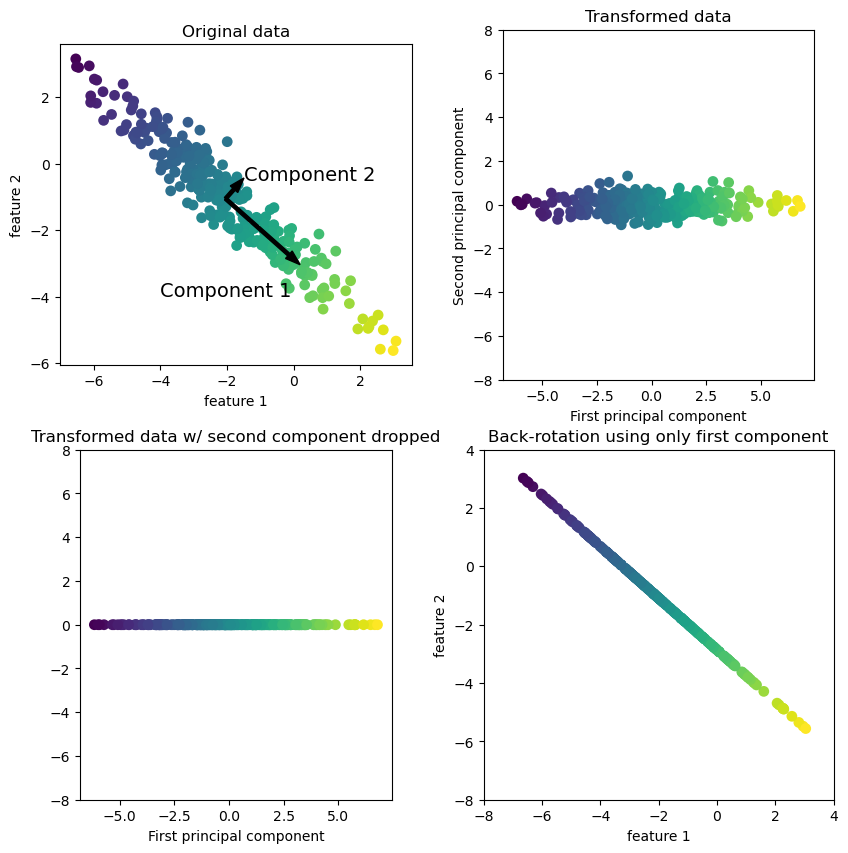

In [2]:
mglearn.plots.plot_pca_illustration()

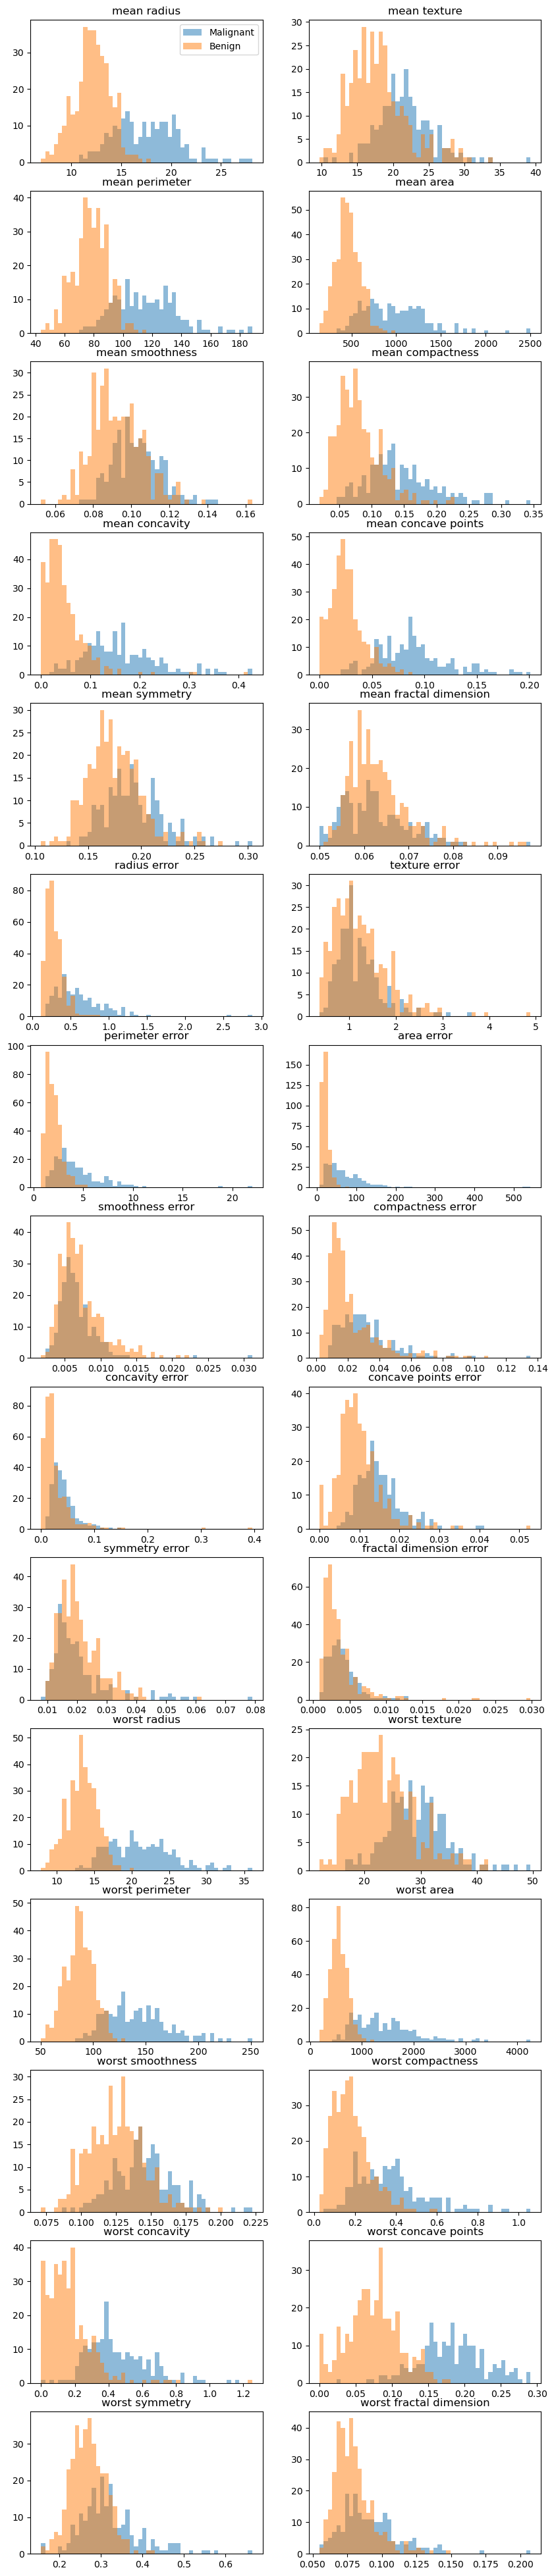

In [19]:
fig, axes = plt.subplots(15, 2, figsize=(10,50))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
ax[0].legend(["Malignant","Benign"])
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print("Original shape: {}".format(X_scaled.shape))
print("Reduced shape: {}".format(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


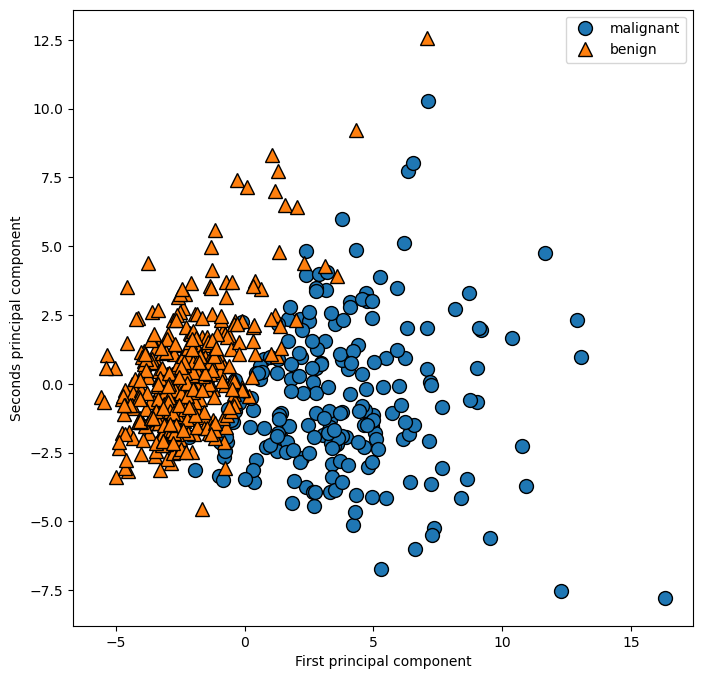

In [33]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names)
plt.xlabel("First principal component")
plt.ylabel("Seconds principal component")
plt.show()

In [37]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


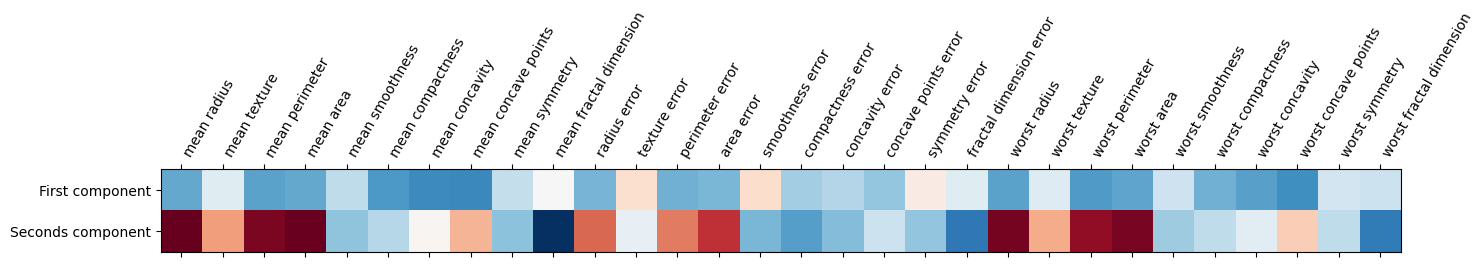

In [47]:
plt.matshow(pca.components_, cmap="RdBu")
plt.yticks([0,1], ["First component","Seconds component"])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")
plt.show()

In [2]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape=people.images[0].shape

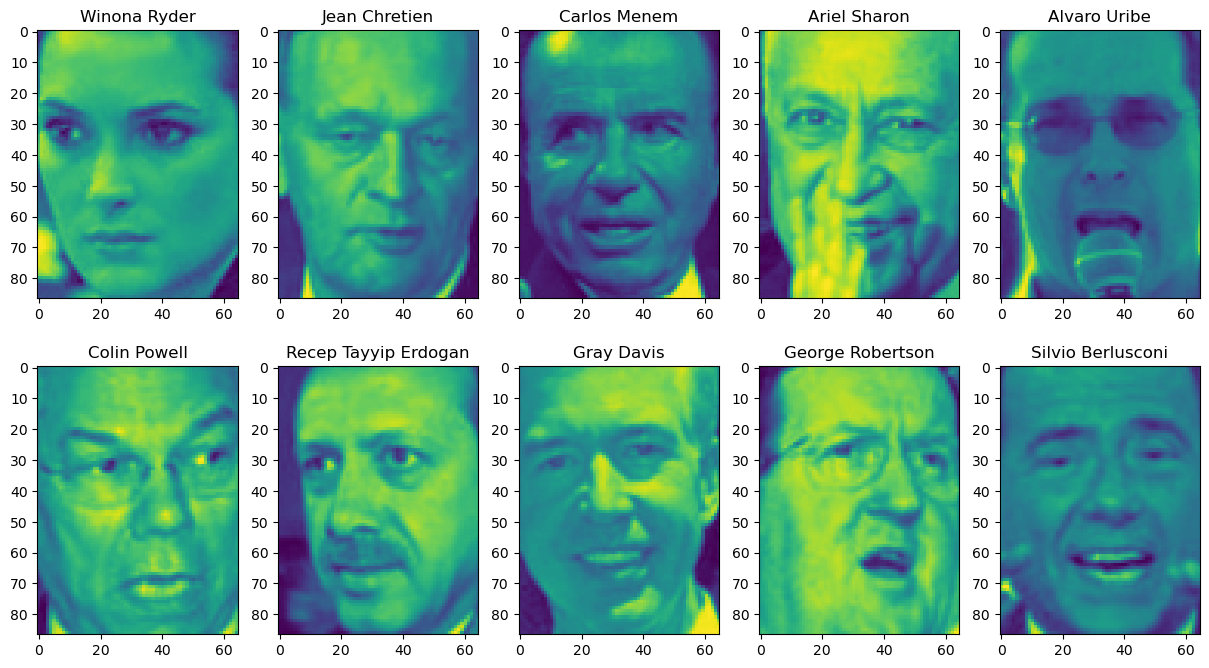

In [3]:
fix, axes = plt.subplots(2, 5, figsize=(15,8))
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [4]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people=people.data[mask]
y_people=people.target[mask]
X_people=X_people/255

from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0, stratify=y_people)
knn=KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print("Test score of 1-nn: {:.2f}".format(knn.score(X_test,y_test)))

Test score of 1-nn: 0.22


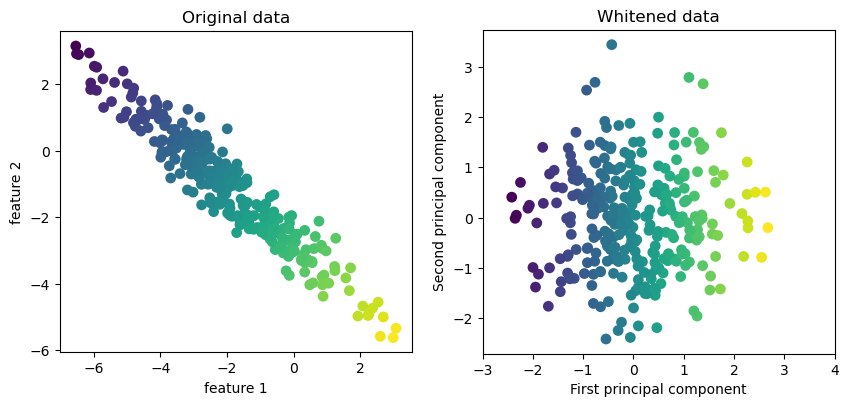

In [59]:
mglearn.plots.plot_pca_whitening()

In [61]:
pca=PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train)
print("New test score of 1-nn: {:.2f}".format(knn.score(X_test_pca,y_test)))

New test score of 1-nn: 0.30


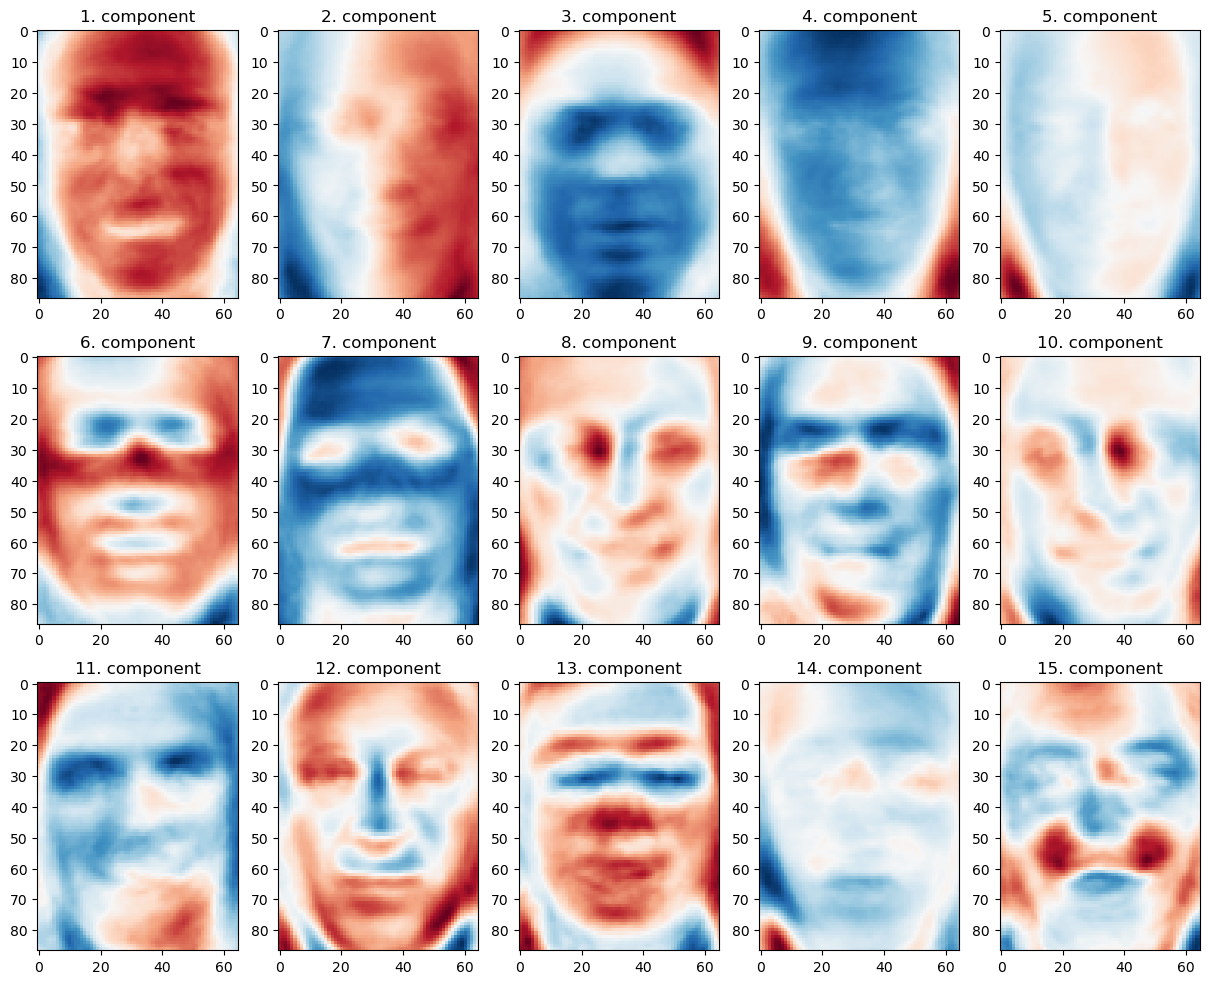

In [63]:
fig, axes = plt.subplots(3, 5, figsize=(15,12))
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="RdBu")
    ax.set_title("{}. component".format((i+1)))

D:\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


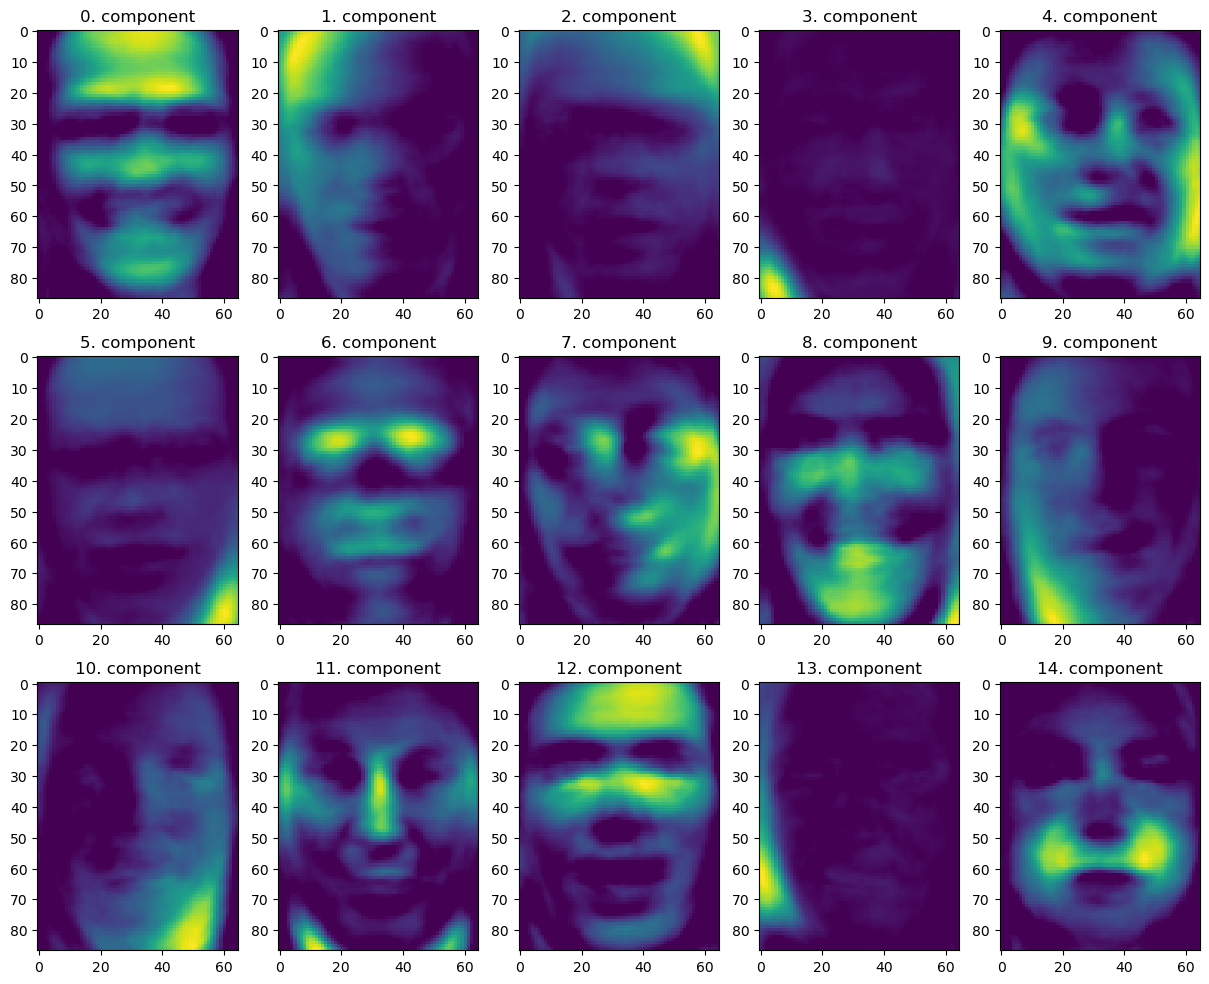

In [6]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)
fig, axes = plt.subplots(3, 5, figsize=(15,12))
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))